Quick notebook to make dataset from previous years results

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
grades= np.genfromtxt("data/assessment-grades-2features.csv", delimiter= ',',skip_header=1)

featureNames=("exam", "CW_mean")
print(grades.shape)
nStudents = grades.shape[0]
X= grades

(150, 2)


In [4]:
outcomes= ("Pass","Resit Exam", "Resit Coursework","Resit Both")
simpleoutcomes= ("pass","resit")


# make target labels
y = np.empty(nStudents, dtype=np.int8)

for row in range (nStudents):
    exam = grades[row][0]
    cw   = grades[row][1]
    if (exam>=35 and cw>=35 and (exam +cw >=80) ):
        y[row] = 0 # PASS 

    elif ( cw>=40 and exam < 40):
        y[row] = 1 #resit just exam 
    elif ( cw<40 and exam>=40):
        y[row]= 2 # resit just coursework
    else:
        y[row] = 3  # resit both
        
ysimple = np.where(y<1,0,1)

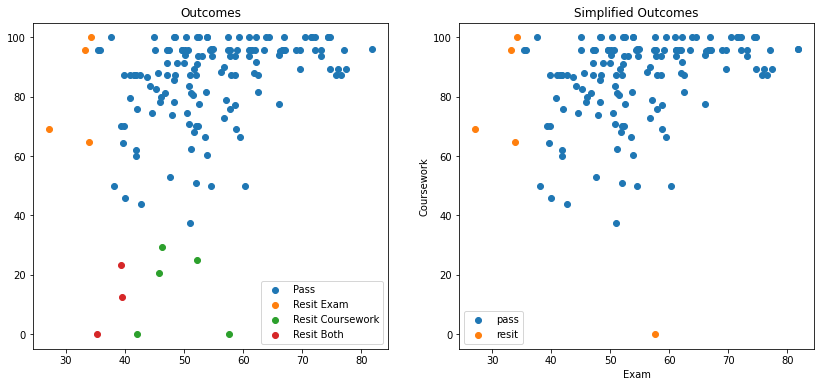

In [28]:
fig,ax = plt.subplots(1,2,figsize=(14,6))

for outcome in range(4):
    thisout = np.empty((0,2))
    thisout2 = np.empty((0,2))
    for row in range (nStudents):
        if(y[row]==outcome):
            thisout = np.vstack((thisout,grades[row]))
        if(ysimple[row]==outcome):
            thisout2 = np.vstack((thisout,grades[row]))
    ax[0].scatter(thisout[:,0],thisout[:,1],label=outcomes[outcome])
    if(outcome<2):
        ax[1].scatter(thisout2[:,0],thisout2[:,1],label=simpleoutcomes[outcome])
plt.xlabel("Exam")
plt.ylabel("Coursework")
ax[0].set_title("Outcomes")
ax[0].legend(loc='best')
ax[1].set_title("Simplified Outcomes")
ax[1].legend(loc='best')



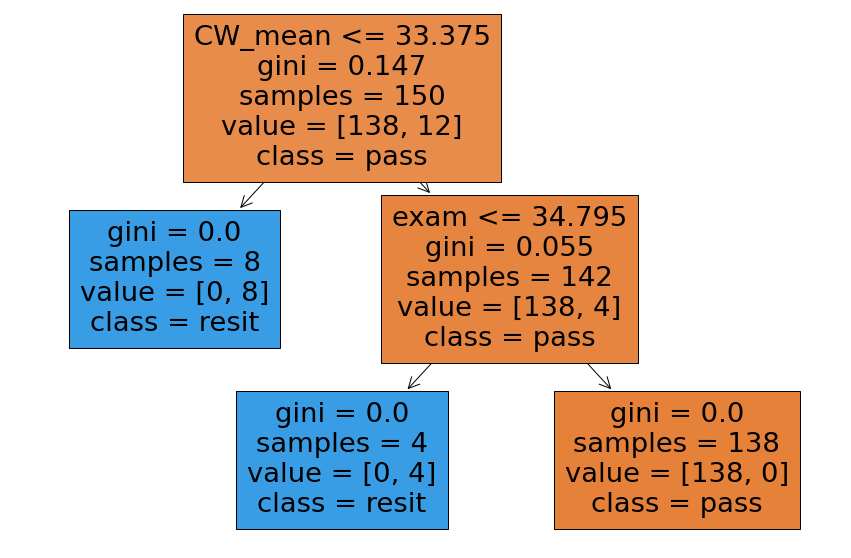

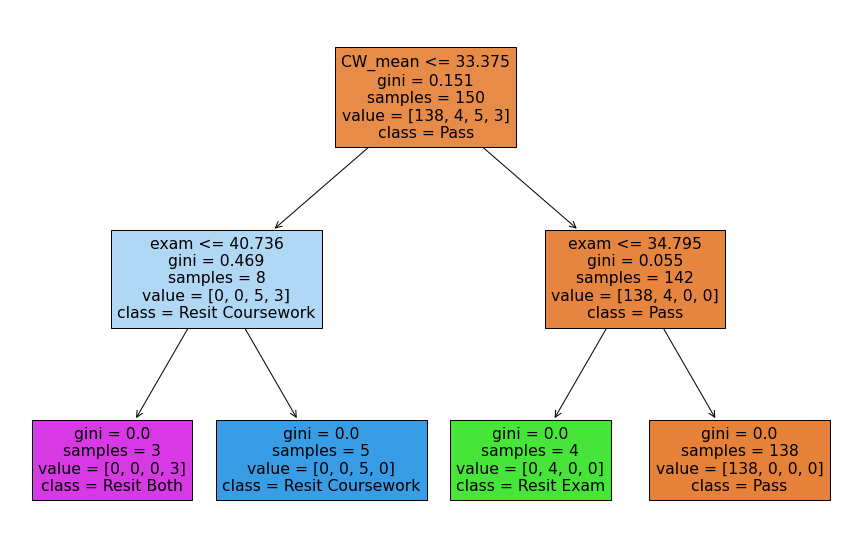

In [8]:

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


model = DecisionTreeClassifier(random_state=1234)
model.fit(X,ysimple)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   feature_names=featureNames,  
                   class_names=simpleoutcomes,
                   filled=True)



model = DecisionTreeClassifier(random_state=1234)
model.fit(X,y)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, 
                   feature_names=featureNames,  
                   class_names=outcomes,
                   filled=True)

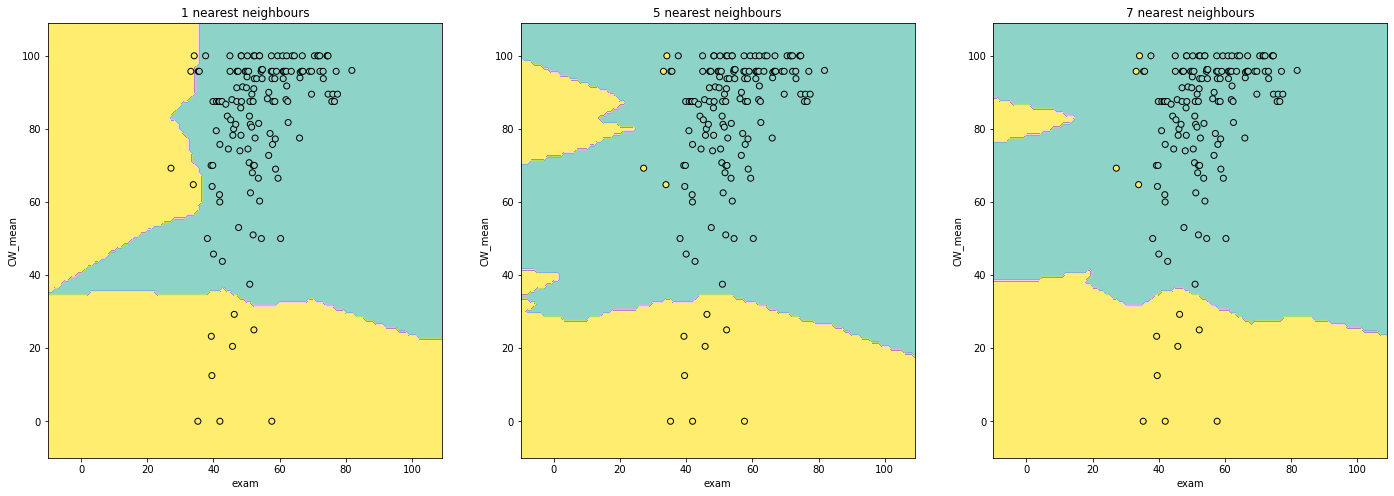

In [20]:
## Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

from sklearn import neighbors

KValues=(1,5,7)
cmap="Set3"
fig,ax= plt.subplots(1,len(KValues),figsize=(24, 8))

#define a grid we use to plot the decision boundaries
h = 1.0    
x_min, x_max = -10,110
y_min, y_max = -10,110
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for k in range(len(KValues)):
    K = KValues[k]
    myKNN = neighbors.KNeighborsClassifier(K)
    myKNN.fit(X,ysimple) 

    #predict and plotfor evey point on the grid
    Z = myKNN.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax[k].set_title("{} nearest neighbours".format(K))
    ax[k].contourf(xx, yy, Z,cmap=cmap)

    # Plot also the training points
    ax[k].scatter(x=X[:,0 ],y= X[:, 1], c=ysimple.astype(float), alpha=1.0, cmap=cmap, edgecolor="black")

    ax[k].set_xlabel(featureNames[0])
    ax[k].set_ylabel(featureNames[1])

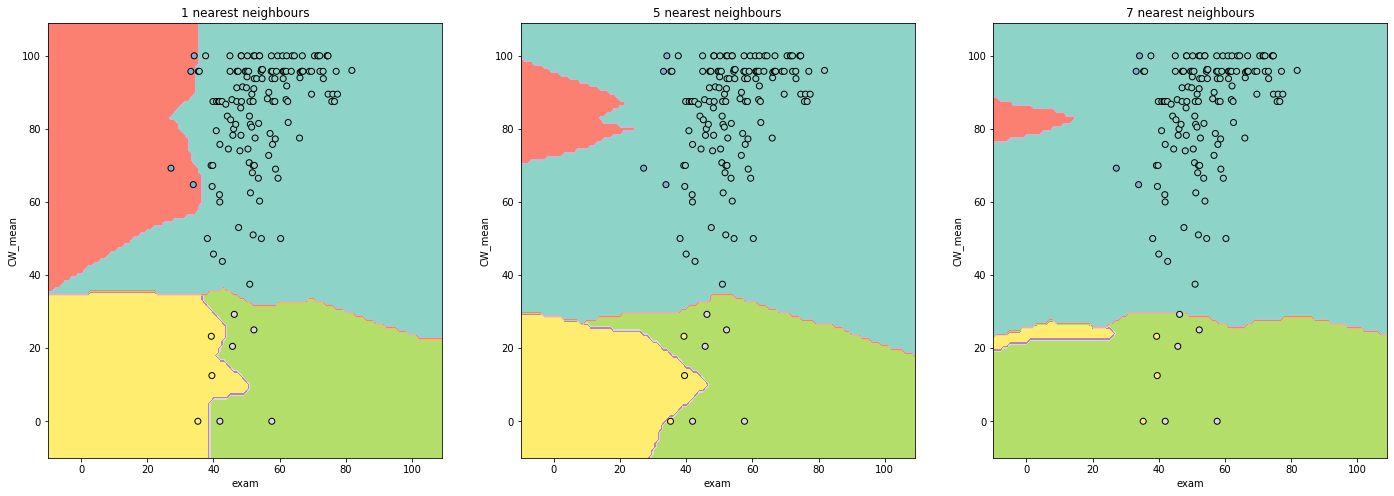

In [21]:
## Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

fig,ax= plt.subplots(1,len(KValues),figsize=(24, 8))

#define a grid we use to plot the decision boundaries
h = 1.0    
x_min, x_max = -10,110
y_min, y_max = -10,110
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for k in range(len(KValues)):
    K = KValues[k]
    myKNN = neighbors.KNeighborsClassifier(K)
    myKNN.fit(X,y) 

    #predict and plotfor evey point on the grid
    Z = myKNN.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax[k].set_title("{} nearest neighbours".format(K))
    ax[k].contourf(xx, yy, Z,cmap=cmap)

    # Plot also the training points
    ax[k].scatter(x=X[:,0 ],y= X[:, 1], c=y.astype(float), alpha=1.0, cmap=cmap, edgecolor="black")

    ax[k].set_xlabel(featureNames[0])
    ax[k].set_ylabel(featureNames[1])